# 먼저
### 제가 이번에 맡은 부분은 분포 시각화 부분이었는데요,  
### 캐글 예시에서 알려준 방법은 seaborn에 있는 distplot으로 히스토그램을 그리는 방법과 kdeplot으로 밀도 분포를 보는 것이었습니다.  
- 캐글 예시에서 사용한 데이터는 다른 데이터지만 저는 타이타닉 데이터로 예시를 들어보겠습니다.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [6]:
os.listdir('../input/titanic')

['train.csv', 'gender_submission.csv', 'test.csv']

In [16]:
train = pd.read_csv('../input/titanic/train.csv')
train.shape

(891, 12)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 다들 타이타닉을 해보셨으니 아시겠지만 Survived가 0과 1로 나누어져 있습니다.  
- 생존자들과 비생존자들의 나이 분포를 한 그래프에 시각화 하는 것을 캐글 예시에 있던 방법으로 해보겠습니다.

- 먼저, seaborn에 있는 distplot과 kdeplot은 Na값이 있으면 그려지지 않습니다..  
- 그래서 결측값이 있는 행들은 모두 삭제하겠습니다.  


- 그 후 생존자 데이터와 비생존자 데이터로 나눕니다. (굳이 안나눠도 되긴합니다..)

In [18]:
train.drop(list(train[train['Age'].isna()].index), axis=0, inplace=True)
train.shape

(714, 12)

In [19]:
is_survived = train[train['Survived']==1]
is_died = train[train['Survived']==0]

## 생존자와 비생존자의 나이 분포를 한 그래프에 histogram으로 나타내기

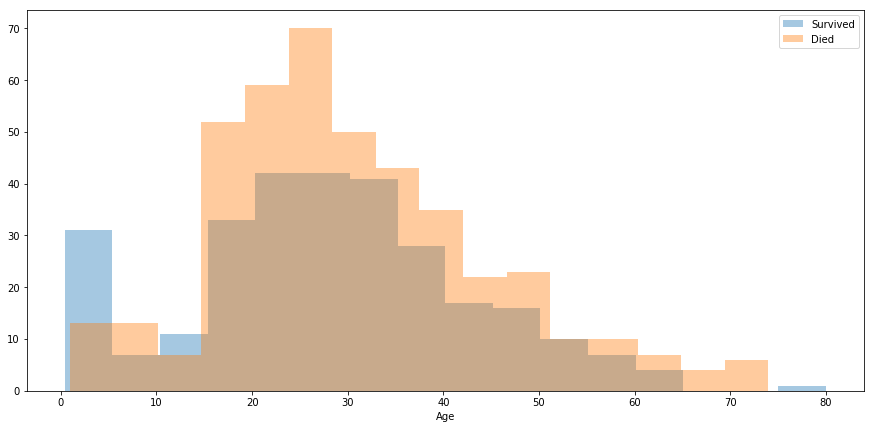

In [20]:
plt.figure(figsize=(15,7))  # 그림 사이즈 설정하는 방법입니다.
sns.distplot(is_survived['Age'], label='Survived', kde=False)
sns.distplot(is_died['Age'], label='Died', kde=False)
plt.legend()

- plt.legend()는 오른쪽 위에 보이는 것 같이 label을 표시해주는 박스를 생성해줍니다.  
- legend에 나타나는 label은 distplot안에서 label파라미터로 설정해 준 값이 나옵니다.  
- 그리고 distplot안에 있는 파라미터 중에 kde를 False로 했는데 디폴트 값은 True입니다.  


- True로 하면 어떻게 되는지 보여드리겠습니다.

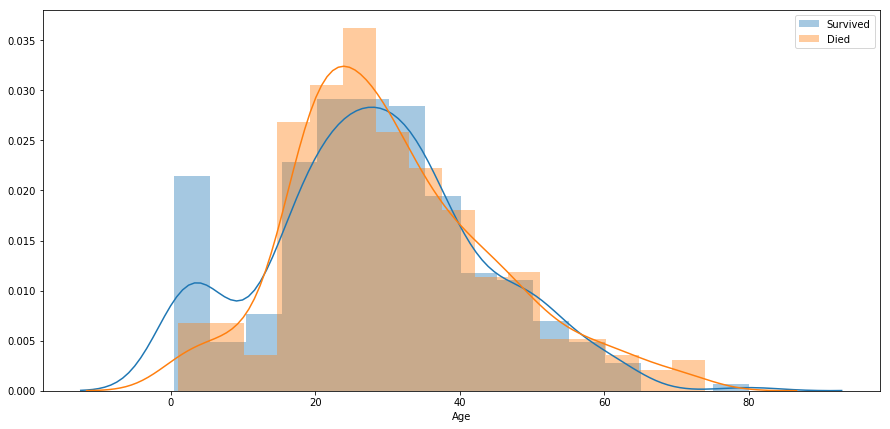

In [21]:
plt.figure(figsize=(15,7))
sns.distplot(is_survived['Age'], label='Survived', kde=True)
sns.distplot(is_died['Age'], label='Died', kde=True)
plt.legend()

이렇게 kdeplot과 같이 그려지면서 y값도 count에서 density로 바뀝니다.  
하지만 캐글 예시에선 히스토그램을 보려했기 때문에 히스토그램을 보기위해선 kde=False로 해주는 것이 좋습니다.

- 이번엔 위에서 distplot(kde=True)로 했을 때 같이 그려지는 kdeplot만 그려보겠습니다.

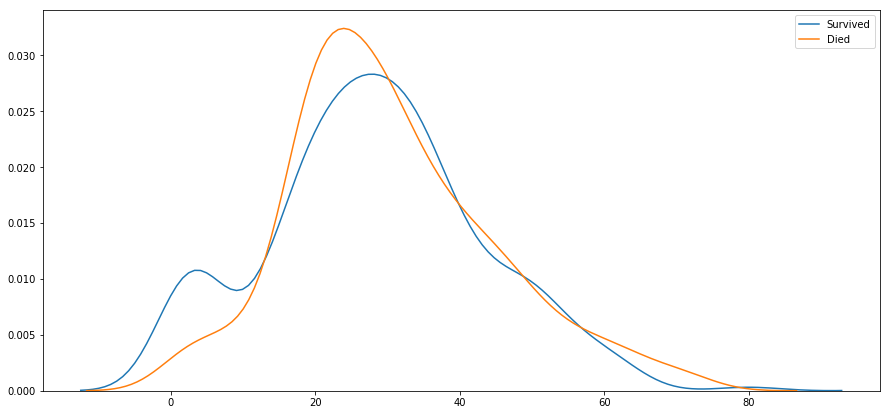

In [22]:
plt.figure(figsize=(15,7))
sns.kdeplot(is_survived['Age'], label='Survived')
sns.kdeplot(is_died['Age'], label='Died')
plt.legend()

- 위에 그린 그래프에 있는 선그래프만 쏙 빼온 걸 알 수 있죠.  
- 이번엔 그래프 밑에 면적을 색칠할 수 있는 파라미터를 알려드리겠습니다.

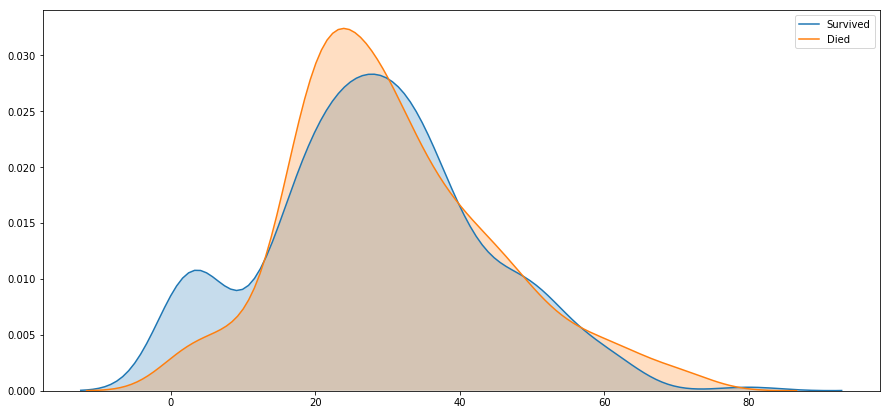

In [23]:
plt.figure(figsize=(15,7))
sns.kdeplot(is_survived['Age'], label='Survived', shade=True)
sns.kdeplot(is_died['Age'], label='Died', shade=True)
plt.legend()

- 이렇게 kdeplot안에 있는 파라미터인 shade를 True로 설정해주면 그래프 면적에 색이 칠해지는 것을 볼 수 있습니다.  
- shade의 디폴트 값은 False입니다.

## 캐글 예시에 있던 방법을 이게 전부였습니다,,

### 더 추가로 작성하고 싶었지만 시각화 능력이 부족하여 이것으로 마치겠습니다..

##### 좀 더 연습해서 좋은 시각화 방법을 알게 되면 그 때 다시 보여드리겠습니다.......